# importing libraries

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Download link: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv

In [3]:
#--loading the data from csv file to pandas datafram

car_data = pd.read_csv('car data.csv')

In [4]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
# --checking the number of rows and columns
car_data.shape

(301, 9)

In [11]:
# --=-getting some information  about the datasets
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [14]:
# checking the number of missing values

car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
# --=--checking the destribution of categorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# encoding Categorical Data

In [16]:
# encoding "Fuel_Type" column
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}},inplace=True)
car_data.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)
car_data.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)


In [17]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [18]:
X = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)

y = car_data['Selling_Price']

In [21]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [22]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# Splitting Training and Test data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state=2)


# Model Training

# LinearRegression

In [33]:
# loading the linear regression model 
lin_reg_model = LinearRegression()

In [34]:
lin_reg_model.fit(X_train, y_train)

LinearRegression()

# model Evaluation

In [35]:
training_data_prediction = lin_reg_model.predict(X_train)

In [36]:
# R squared error
error_score = metrics.r2_score(y_train, training_data_prediction)
print('R squared Erroe', error_score)

R squared Erroe 0.8799451660493711


In [40]:
lin_reg_model.score

<bound method RegressorMixin.score of LinearRegression()>

# Visualize the actual price and training_data_prediction

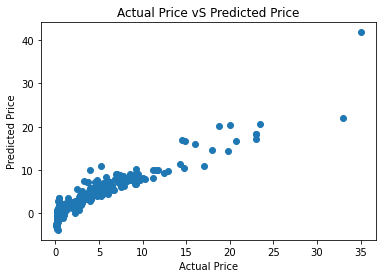

In [43]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vS Predicted Price')
plt.show()

In [44]:
test_data_prediction = lin_reg_model.predict(X_test)

In [45]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print('R squared Erroe', error_score)

R squared Erroe 0.8365766715026396


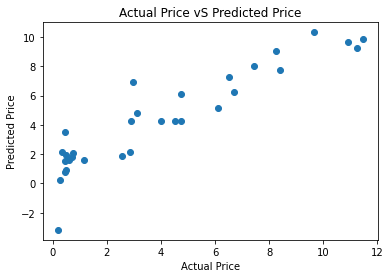

In [46]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vS Predicted Price')
plt.show()

# loss regression

In [47]:
lass_reg_model = Lasso()


In [48]:
lass_reg_model.fit(X_train, y_train)

Lasso()

# Model Evaluation 

In [49]:
training_data_prediction = lass_reg_model.predict(X_train)

In [50]:
# R squared error
error_score = metrics.r2_score(y_train, training_data_prediction)
print('R squared Erroe', error_score)

R squared Erroe 0.8427856123435794


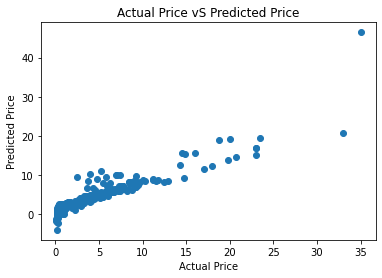

In [51]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vS Predicted Price')
plt.show()

In [52]:
test_data_prediction = lass_reg_model.predict(X_test)

In [54]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print('R squared Erroe', error_score)

R squared Erroe 0.8709167941173195


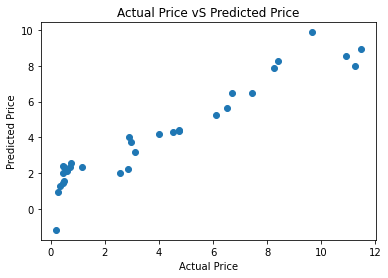

In [56]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vS Predicted Price')
plt.show()